In [1]:
import numpy as np
import pandas as pd
import warnings
import codecs
import os

import aut_vinc_bballCrawler as bc

In [156]:
pergame = bc.getSoupFromURL('http://www.basketball-reference.com/leagues/NBA_2016_per_game.html')
pg = pergame.findAll('table')
header = []
for th in pg[0].findAll('th'):
    if not th.getText() in header:
        header.append(th.getText())
rows = pg[0].findAll('tr')[1:]  # all rows but the header
rows = [r for r in rows if len(r.findAll('td')) > 0]
parsed_table = [[col.getText() for col in row.findAll('td')] for row in rows]
ptable_16 = pd.io.parsers.TextParser(parsed_table, names=header[1:30]).get_chunk()

In [157]:
# invert the turnover metric
ptable_16.TOV = 1/ptable_16.TOV
feature_vec = ['FG%','FT%','3P','TRB','AST','STL','BLK','TOV','PS/G']
ptable_16.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,Quincy Acy,PF,25,SAC,59,29,14.8,2.0,3.6,0.556,...,0.735,1.1,2.1,3.2,0.5,0.5,0.4,2.000000,1.7,5.2
1,Jordan Adams,SG,21,MEM,2,0,7.5,1.0,3.0,0.333,...,0.600,0.0,1.0,1.0,1.5,1.5,0.0,1.000000,1.0,3.5
2,Steven Adams,C,22,OKC,80,80,25.2,3.3,5.3,0.613,...,0.582,2.7,3.9,6.7,0.8,0.5,1.1,0.909091,2.8,8.0
3,Arron Afflalo,SG,30,NYK,71,57,33.4,5.0,11.3,0.443,...,0.840,0.3,3.4,3.7,2.0,0.4,0.1,0.833333,2.0,12.8
4,Alexis Ajinca,C,27,NOP,59,17,14.6,2.5,5.3,0.476,...,0.839,1.3,3.3,4.6,0.5,0.3,0.6,1.111111,2.3,6.0


In [344]:
pergame = bc.getSoupFromURL('http://www.basketball-reference.com/leagues/NBA_2015_per_game.html')
pg = pergame.findAll('table')
header = []
for th in pg[0].findAll('th'):
    if not th.getText() in header:
        header.append(th.getText())
rows = pg[0].findAll('tr')[1:]  # all rows but the header
rows = [r for r in rows if len(r.findAll('td')) > 0]
parsed_table = [[col.getText() for col in row.findAll('td')] for row in rows]
ptable_15 = pd.io.parsers.TextParser(parsed_table, names=header[1:30]).get_chunk()
# invert the turnover metric
ptable_15.TOV = 1/ptable_15.TOV
feature_vec = ['FG%','FT%','3P','TRB','AST','STL','BLK','TOV','PS/G']
ptable_15.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,Quincy Acy,PF,24,NYK,68,22,18.9,2.2,4.9,0.459,...,0.784,1.2,3.3,4.4,1.0,0.4,0.3,1.111111,2.2,5.9
1,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,0.407,...,0.609,0.3,0.6,0.9,0.5,0.5,0.2,2.000000,0.8,3.1
2,Steven Adams,C,21,OKC,70,67,25.3,3.1,5.7,0.544,...,0.502,2.8,4.6,7.5,0.9,0.5,1.2,0.714286,3.2,7.7
3,Jeff Adrien,PF,28,MIN,17,0,12.6,1.1,2.6,0.432,...,0.579,1.4,3.2,4.5,0.9,0.2,0.5,2.000000,1.8,3.5
4,Arron Afflalo,SG,29,TOT,78,72,32.1,4.8,11.3,0.424,...,0.843,0.3,2.8,3.2,1.7,0.5,0.1,0.666667,2.1,13.3


In [39]:
player_list = [plyr for plyr in ptable_15.index if plyr in ptable_16.index]

In [180]:
player_list = list(set(ptable_15.Player).intersection(set(ptable_16.Player)))

In [209]:
selection_vec = ['Player', 'FG%','FT%','3P','TRB','AST','STL','BLK','TOV','PS/G']

In [223]:
dupl_names = ptable_15.Player[ptable_15.Player.duplicated()].unique()

In [552]:
ptable_15s = ptable_15.loc[:, selection_vec]
ptable_16s = ptable_16.loc[:, selection_vec]

In [230]:
import seaborn as sns

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt

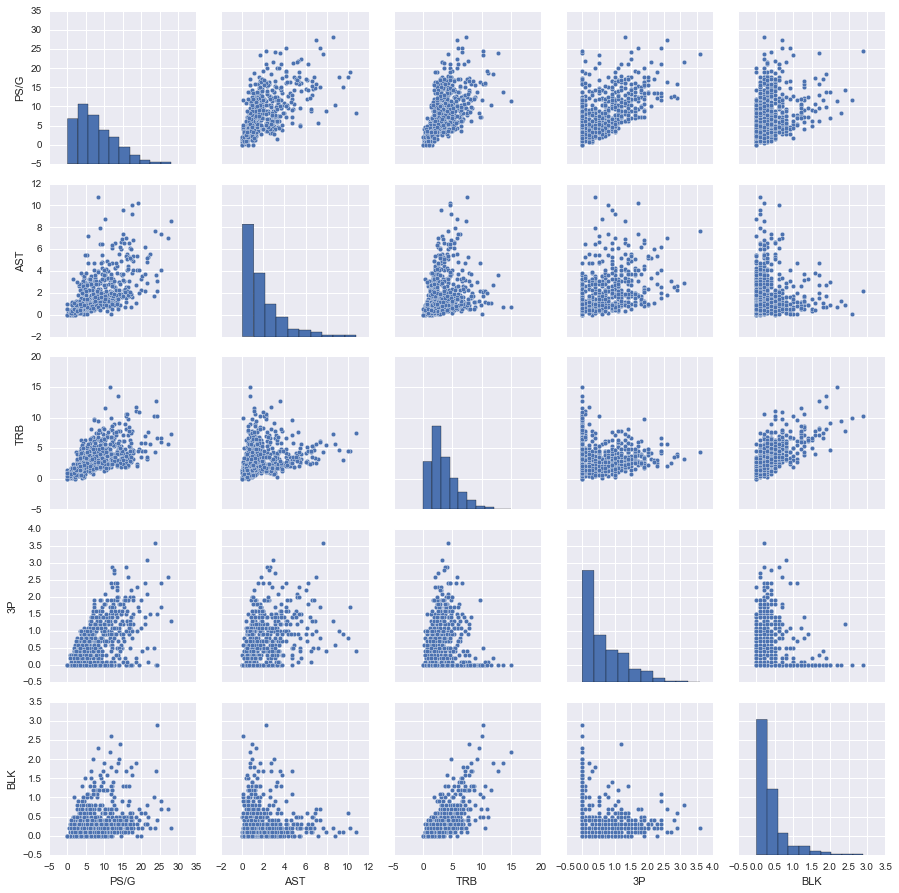

In [258]:
# sns.pairplot(ptable_15s[['PS/G', 'AST', 'TRB', '3P', 'BLK']], size=2.5)

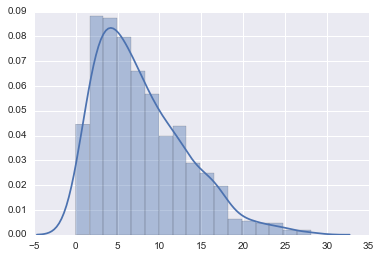

In [263]:
sns.distplot(ptable_15s[['PS/G']])

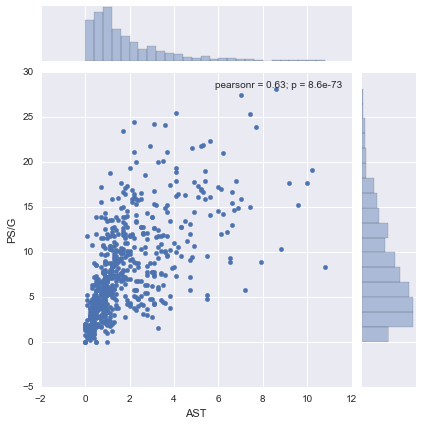

In [264]:
sns.jointplot(x='AST', y='PS/G', data=ptable_15s)

Can do the below if I want to replace NaN with mean of the column.

Instead find these correspond to player I'll drop (see further below).

In [431]:
# from sklearn.preprocessing import Imputer
# imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
# ptable_15s = ptable_15.loc[:, selection_vec]
# imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
# imr.fit(ptable_15s.loc[:, 'FG%'].reshape(-1, 1))
# imr_dat = imr.transform(ptable_15s.loc[:, 'FG%'].reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

#### Checking whether players with `NaN` values are scrubs...
Seems they are.

In [553]:
nans = np.where(np.isnan(ptable_15s.iloc[:, 1:].values) == True)[0]
for n in nans:
    print(ptable_15s.Player[n])

Jerrelle Benimon
Jerrelle Benimon
Sim Bhullar
Bruno Caboclo
Patrick Christopher
Victor Claver
Seth Curry
Luigi Datome
Andre Dawkins
Jamaal Franklin
JaMychal Green
Jordan Hamilton
Grant Jerrett
Malcolm Lee
Kalin Lucas
Cartier Martin
Gal Mekel
Darius Miller
Quincy Miller
Eric Moreland
Toure' Murry
Steve Novak
A.J. Price
Russ Smith
Ronny Turiaf
Ronny Turiaf
David Wear


#### ...drop these players

#### A few players have 'Inf' TOV because they also are scrubs.
So we'll remove them too

In [554]:
ptable_15s = ptable_15s.dropna()
ptable_16s = ptable_16s.dropna()
ptable_15s = ptable_15s.iloc[list(np.where(np.isinf(ptable_15s.TOV)==False)[0]), :]
ptable_16s = ptable_16s.iloc[list(np.where(np.isinf(ptable_16s.TOV)==False)[0]), :]

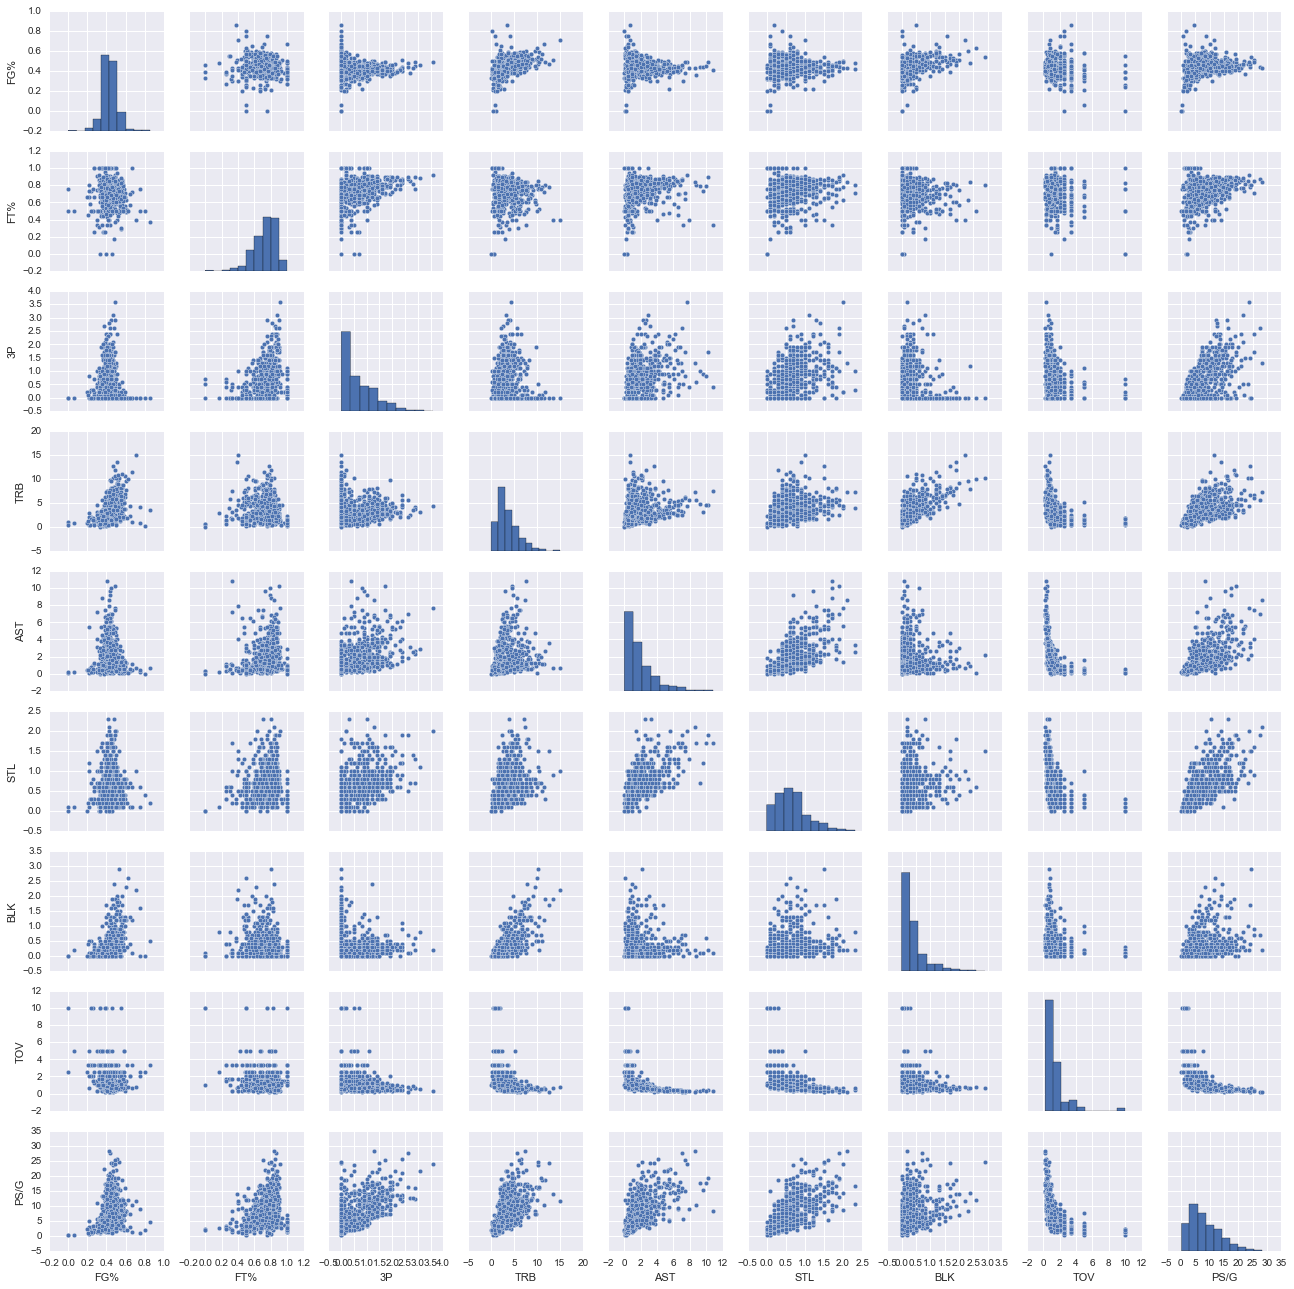

In [555]:
# sns.pairplot(ptable_15s.iloc[:, 1:], size=2.5)
# ['FG%','FT%','3P','TRB','AST','STL','BLK','TOV','PS/G']
sns.pairplot(ptable_15s.iloc[:, 1:], size=2)

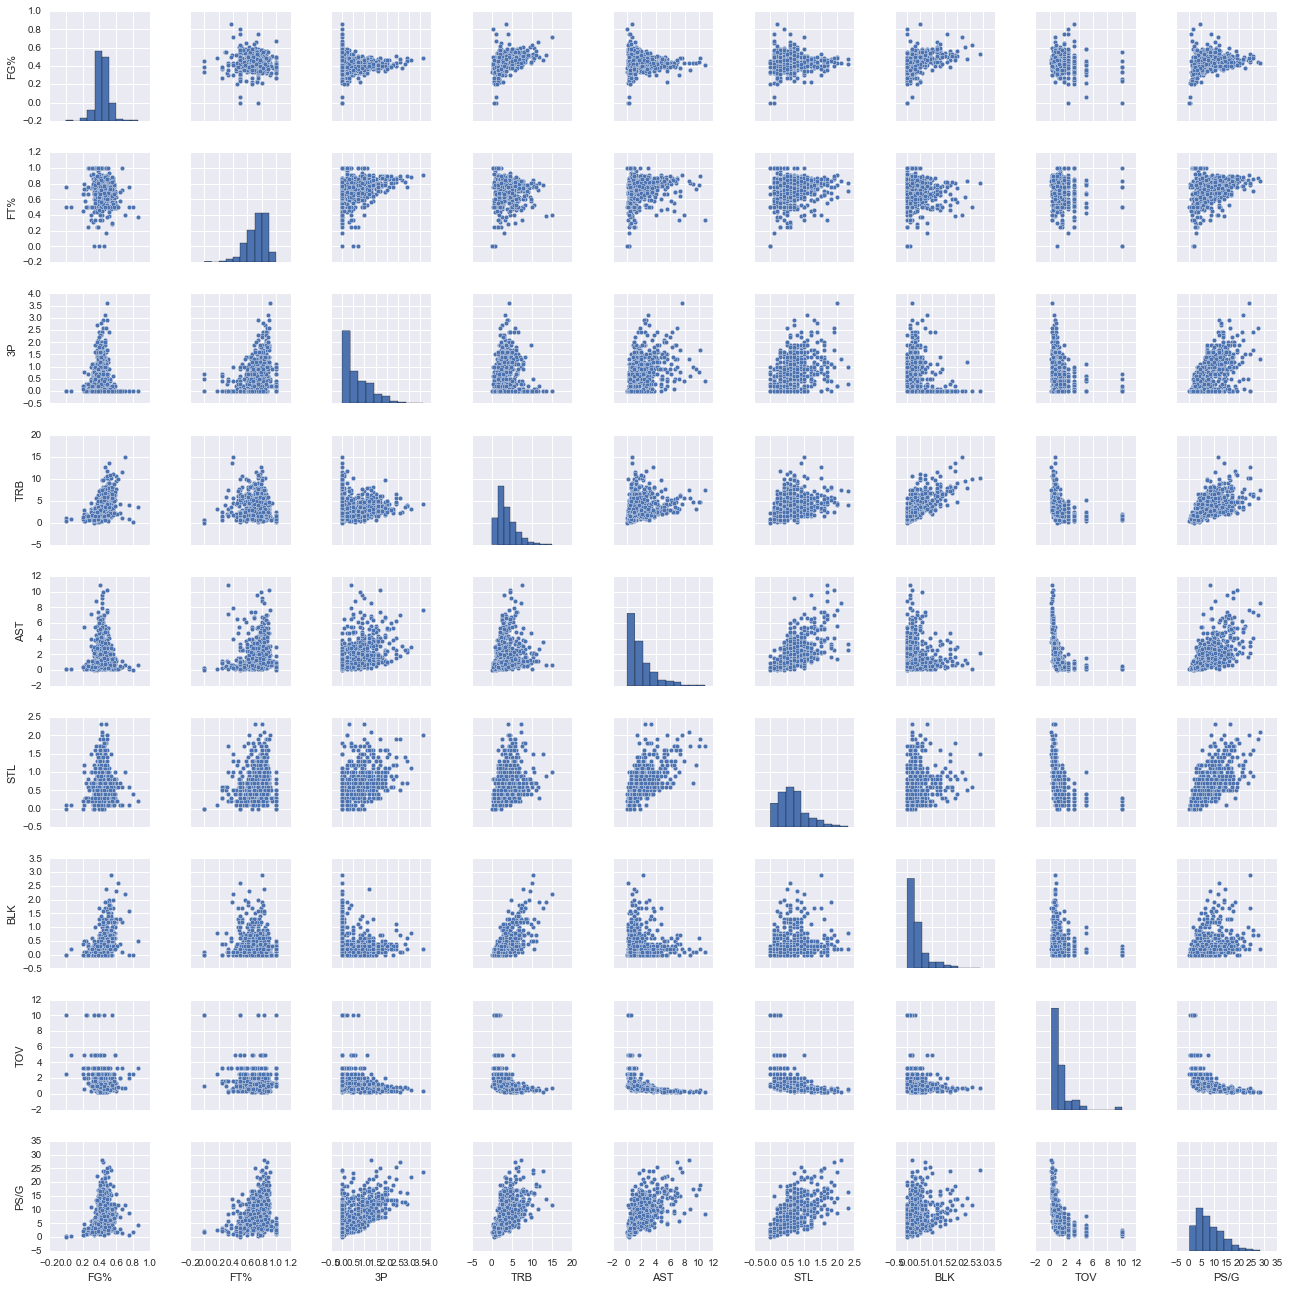

In [557]:
sns.pairplot(ptable_15s.iloc[:, 1:], size=2)
plt.tight_layout()
plt.show()